In [11]:
import scipy
print scipy.__file__
print scipy.__version__
%matplotlib inline

/usr/local/lib/python2.7/site-packages/scipy/__init__.pyc
0.17.0


In [12]:
import numpy as np

def fun_rosenbrock(x):
    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])

In [13]:
import scipy.optimize
from scipy.optimize import least_squares
x0_rosenbrock = np.array([2, 2])
res_1 = least_squares(fun_rosenbrock, x0_rosenbrock)
print res_1.x
print res_1.cost
print res_1.optimality

[ 1.  1.]
9.86692429108e-30
8.89288649342e-14


In [14]:
def jac_rosenbrock(x):
    return np.array([
        [-20 * x[0], 10],
        [-1, 0]])

res_2 = least_squares(fun_rosenbrock, x0_rosenbrock, jac_rosenbrock,
                      bounds=([-np.inf, 1.5], np.inf))
print res_2.x

print res_2.cost

print res_2.optimality

[ 1.22437075  1.5       ]
0.0252130939468
1.58854014332e-07


In [15]:
def fun_broyden(x):
    f = (3 - x) * x + 1
    f[1:] -= x[:-1]
    f[:-1] -= 2 * x[1:]
    return f

from scipy.sparse import lil_matrix
def sparsity_broyden(n):
    sparsity = lil_matrix((n, n), dtype=int)
    i = np.arange(n)
    sparsity[i, i] = 1
    i = np.arange(1, n)
    sparsity[i, i - 1] = 1
    i = np.arange(n - 1)
    sparsity[i, i + 1] = 1
    return sparsity

n = 100000
x0_broyden = -np.ones(n)

res_3 = least_squares(fun_broyden, x0_broyden,
                      jac_sparsity=sparsity_broyden(n))
print res_3.x

print res_3.cost

print res_3.optimality


[-0.76879999 -0.94872671 -0.98873125 ..., -0.89720159 -0.77106105
 -0.50525835]
4.56871619661e-23
1.16504542969e-11


In [16]:
def gen_data(t, a, b, c, noise=0, n_outliers=0, random_state=0):
    y = a + b * np.exp(t * c)

    rnd = np.random.RandomState(random_state)
    error = noise * rnd.randn(t.size)
    outliers = rnd.randint(0, t.size, n_outliers)
    error[outliers] *= 10

    return y + error

a = 0.5
b = 2.0
c = -1
t_min = 0
t_max = 10
n_points = 15

t_train = np.linspace(t_min, t_max, n_points)
y_train = gen_data(t_train, a, b, c, noise=0.1, n_outliers=3)

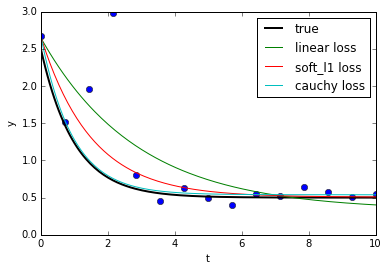

In [17]:
def fun(x, t, y):
    return x[0] + x[1] * np.exp(x[2] * t) - y

x0 = np.array([1.0, 1.0, 0.0])

res_lsq = least_squares(fun, x0, args=(t_train, y_train))

res_soft_l1 = least_squares(fun, x0, loss='soft_l1', f_scale=0.1,
                            args=(t_train, y_train))
res_log = least_squares(fun, x0, loss='cauchy', f_scale=0.1,
                        args=(t_train, y_train))

t_test = np.linspace(t_min, t_max, n_points * 10)
y_true = gen_data(t_test, a, b, c)
y_lsq = gen_data(t_test, *res_lsq.x)
y_soft_l1 = gen_data(t_test, *res_soft_l1.x)
y_log = gen_data(t_test, *res_log.x)

import matplotlib.pyplot as plt
plt.plot(t_train, y_train, 'o')
plt.plot(t_test, y_true, 'k', linewidth=2, label='true')
plt.plot(t_test, y_lsq, label='linear loss')
plt.plot(t_test, y_soft_l1, label='soft_l1 loss')
plt.plot(t_test, y_log, label='cauchy loss')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()